In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('ggplot')

In [66]:
read_data = pd.read_csv("Data/Meteorite_Landings_20240107.csv")

In [44]:
print(read_data.shape)
read_data.head()

(45716, 10)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [45]:
read_data.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [46]:
# Function to combine two columns into a list
def combine_columns(row):
    return [row['reclat'], row['reclong']]

# Applying the function to create the new column
read_data['location'] = read_data.apply(lambda row: combine_columns(row), axis=1)


In [47]:
Col_drop = ['nametype','reclat','reclong','GeoLocation']
read_data.drop(Col_drop, axis=1, inplace = True)
read_data.head()

,name,id,recclass,mass (g),fall,year,location
0,Aachen,1,L5,21.0,Fell,1880.0,"[50.775, 6.08333]"
1,Aarhus,2,H6,720.0,Fell,1951.0,"[56.18333, 10.23333]"
2,Abee,6,EH4,107000.0,Fell,1952.0,"[54.21667, -113.0]"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,"[16.88333, -99.9]"
4,Achiras,370,L6,780.0,Fell,1902.0,"[-33.16667, -64.95]"


In [56]:
work_data = read_data[read_data['year']>1970.0]
work_data = work_data[work_data['year']<2025.0]

Text(0.5, 1.0, 'Histogram of Meteorite Occurences 1950-Present')

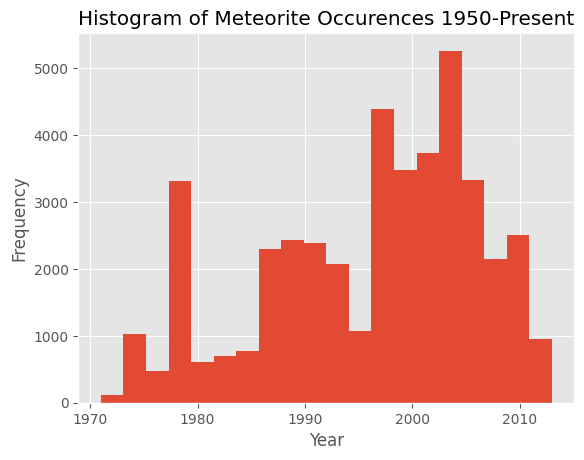

In [58]:
work_data['year'].hist(bins=20)
# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Meteorite Occurences 1950-Present')

In [59]:
work_data.isna().sum()

name         0
id           0
recclass     0
mass (g)    64
fall         0
year         0
location     0
dtype: int64

In [61]:
work_data.loc[work_data['mass (g)'].isna() ==True]

,name,id,recclass,mass (g),fall,year,location
262,Dunhua,7749,Stone-uncl,NaN,Fell,1976.0,"[43.33333, 128.25]"
324,Gasseltepaoua,10866,H5,NaN,Fell,2000.0,"[14.15083, -2.04167]"
346,Guangnan,11436,L6,NaN,Fell,1983.0,"[24.1, 105.0]"
775,Pê,18179,L6,NaN,Fell,1989.0,"[11.33367, -3.54217]"
5160,Blumenau,5089,"Iron, IVA",NaN,Found,1986.0,"[-26.92383, -49.05883]"
...,...,...,...,...,...,...,...
31059,Österplana 046,44846,Relict OC,NaN,Found,2002.0,"[58.58333, 13.43333]"
31060,Österplana 047,44847,Relict OC,NaN,Found,2002.0,"[58.58333, 13.43333]"
31142,Paracutu,18100,"Iron, IAB complex",NaN,Found,1980.0,"[nan, nan]"
38285,Weiyuan,24233,Mesosiderite,NaN,Found,1978.0,"[35.26667, 104.31667]"


In [63]:
work_data.dropna(inplace = True)
work_data.shape

(43018, 7)

In [69]:
import plotly.express as px

# Create a Plotly figure using Plotly Express
fig = px.scatter_geo(read_data, lat='reclat', lon='reclong', hover_name='name')
fig.update_geos(projection_type='orthographic')  # Set map projection (optional)

# Save the figure as an HTML file
fig.write_html('interactive_map.html')